# Tree based models for classification and regression 

# Classification Tree
* given a labeled data set a classification learns a sequence of if-else questions about individual features in order to infer labels
* in contrast to linear models, trees are able to capture nonlinear relationships between features and labels
* trees don't require the features to be scaled
* The total number of branches traversing the top to the bottom of the tree is known as the maximum depth

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cancer = pd.read_csv('data/wisconsin_breast_cancer.csv')

In [3]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
X = cancer[['radius_mean','concave points_mean']].values

In [6]:
y = cancer['diagnosis']
y = y.map(dict(M=1, B=0))
y = y.values

In [7]:
X.shape, y.shape

((569, 2), (569,))

In [7]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#import train test split
from sklearn.model_selection import train_test_split

#import accuracy-score
from sklearn.metrics import accuracy_score

#split data into 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=1)

#instantiate decision tree classifier
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

#fit
dt.fit(X_train, y_train)

#test (predict)
y_pred = dt.predict(X_test)

#score the model
accuracy_score(y_test, y_pred)

0.9035087719298246

### To understand the tree's predictions more concretely let's see how it classifies instances in feature-space
* a classification model divides the feature space into regions where all instances are assigned to only one class-label
* these regions are decision regions
    * separated by spaces known as decision boundaries

# <font color='red'> **** GIVEN FUNCTION **** </font> 

In [9]:
def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()
    
def plot_decision_regions(X, y, clf,
                          feature_index=None,
                          filler_feature_values=None,
                          filler_feature_ranges=None,
                          ax=None,
                          X_highlight=None,
                          res=0.02, legend=1,
                          hide_spines=True,
                          markers='s^oxv<>',
                          colors='red,blue,limegreen,gray,cyan'):
    """Plot decision regions of a classifier.

    Please note that this functions assumes that class labels are
    labeled consecutively, e.g,. 0, 1, 2, 3, 4, and 5. If you have class
    labels with integer labels > 4, you may want to provide additional colors
    and/or markers as `colors` and `markers` arguments.
    See http://matplotlib.org/examples/color/named_colors.html for more
    information.

    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
        Feature Matrix.
    y : array-like, shape = [n_samples]
        True class labels.
    clf : Classifier object.
        Must have a .predict method.
    feature_index : array-like (default: (0,) for 1D, (0, 1) otherwise)
        Feature indices to use for plotting. The first index in
        `feature_index` will be on the x-axis, the second index will be
        on the y-axis.
    filler_feature_values : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted.
    filler_feature_ranges : dict (default: None)
        Only needed for number features > 2. Dictionary of feature
        index-value pairs for the features not being plotted. Will use the
        ranges provided to select training samples for plotting.
    ax : matplotlib.axes.Axes (default: None)
        An existing matplotlib Axes. Creates
        one if ax=None.
    X_highlight : array-like, shape = [n_samples, n_features] (default: None)
        An array with data points that are used to highlight samples in `X`.
    res : float or array-like, shape = (2,) (default: 0.02)
        Grid width. If float, same resolution is used for both the x- and
        y-axis. If array-like, the first item is used on the x-axis, the
        second is used on the y-axis. Lower values increase the resolution but
        slow down the plotting.
    hide_spines : bool (default: True)
        Hide axis spines if True.
    legend : int (default: 1)
        Integer to specify the legend location.
        No legend if legend is 0.
    markers : str (default 's^oxv<>')
        Scatterplot markers.
    colors : str (default 'red,blue,limegreen,gray,cyan')
        Comma separated list of colors.

    Returns
    ---------
    ax : matplotlib.axes.Axes object

    """

    check_Xy(X, y, y_int=True)  # Validate X and y arrays
    dim = X.shape[1]

    if ax is None:
        ax = plt.gca()

    if isinstance(res, float):
        xres, yres = res, res
    else:
        try:
            xres, yres = res
        except ValueError:
            raise ValueError('Unable to unpack res. Expecting '
                             'array-like input of length 2.')

    plot_testdata = True
    if not isinstance(X_highlight, np.ndarray):
        if X_highlight is not None:
            raise ValueError('X_highlight must be a NumPy array or None')
        else:
            plot_testdata = False
    elif len(X_highlight.shape) < 2:
        raise ValueError('X_highlight must be a 2D array')

    if feature_index is not None:
        # Unpack and validate the feature_index values
        if dim == 1:
            raise ValueError(
                'feature_index requires more than one training feature')
        try:
            x_index, y_index = feature_index
        except ValueError:
            raise ValueError(
                'Unable to unpack feature_index. Make sure feature_index '
                'only has two dimensions.')
        try:
            X[:, x_index], X[:, y_index]
        except IndexError:
            raise IndexError(
                'feature_index values out of range. X.shape is {}, but '
                'feature_index is {}'.format(X.shape, feature_index))
    else:
        feature_index = (0, 1)
        x_index, y_index = feature_index

    # Extra input validation for higher number of training features
    if dim > 2:
        if filler_feature_values is None:
            raise ValueError('Filler values must be provided when '
                             'X has more than 2 training features.')

        if filler_feature_ranges is not None:
            if not set(filler_feature_values) == set(filler_feature_ranges):
                raise ValueError(
                    'filler_feature_values and filler_feature_ranges must '
                    'have the same keys')

        # Check that all columns in X are accounted for
        column_check = np.zeros(dim, dtype=bool)
        for idx in filler_feature_values:
            column_check[idx] = True
        for idx in feature_index:
            column_check[idx] = True
        if not all(column_check):
            missing_cols = np.argwhere(~column_check).flatten()
            raise ValueError(
                'Column(s) {} need to be accounted for in either '
                'feature_index or filler_feature_values'.format(missing_cols))

    marker_gen = cycle(list(markers))

    n_classes = np.unique(y).shape[0]
    colors = colors.split(',')
    colors_gen = cycle(colors)
    colors = [next(colors_gen) for c in range(n_classes)]

    # Get minimum and maximum
    x_min, x_max = X[:, x_index].min() - 1, X[:, x_index].max() + 1
    if dim == 1:
        y_min, y_max = -1, 1
    else:
        y_min, y_max = X[:, y_index].min() - 1, X[:, y_index].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, xres),
                         np.arange(y_min, y_max, yres))

    if dim == 1:
        X_predict = np.array([xx.ravel()]).T
    else:
        X_grid = np.array([xx.ravel(), yy.ravel()]).T
        X_predict = np.zeros((X_grid.shape[0], dim))
        X_predict[:, x_index] = X_grid[:, 0]
        X_predict[:, y_index] = X_grid[:, 1]
        if dim > 2:
            for feature_idx in filler_feature_values:
                X_predict[:, feature_idx] = filler_feature_values[feature_idx]
    Z = clf.predict(X_predict)
    Z = Z.reshape(xx.shape)
    # Plot decisoin region
    ax.contourf(xx, yy, Z,
                alpha=0.3,
                colors=colors,
                levels=np.arange(Z.max() + 2) - 0.5)

    ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())

    # Scatter training data samples
    for idx, c in enumerate(np.unique(y)):
        if dim == 1:
            y_data = [0 for i in X[y == c]]
            x_data = X[y == c]
        elif dim == 2:
            y_data = X[y == c, y_index]
            x_data = X[y == c, x_index]
        elif dim > 2 and filler_feature_ranges is not None:
            class_mask = y == c
            feature_range_mask = get_feature_range_mask(
                            X, filler_feature_values=filler_feature_values,
                            filler_feature_ranges=filler_feature_ranges)
            y_data = X[class_mask & feature_range_mask, y_index]
            x_data = X[class_mask & feature_range_mask, x_index]
        else:
            continue

        ax.scatter(x=x_data,
                   y=y_data,
                   alpha=0.8,
                   c=colors[idx],
                   marker=next(marker_gen),
                   edgecolor='black',
                   label=c)

    if hide_spines:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    if dim == 1:
        ax.axes.get_yaxis().set_ticks([])

    if legend:
        if dim > 2 and filler_feature_ranges is None:
            pass
        else:
            handles, labels = ax.get_legend_handles_labels()
            ax.legend(handles, labels,
                      framealpha=0.3, scatterpoints=1, loc=legend)

    if plot_testdata:
        if dim == 1:
            x_data = X_highlight
            y_data = [0 for i in X_highlight]
        elif dim == 2:
            x_data = X_highlight[:, x_index]
            y_data = X_highlight[:, y_index]
        else:
            feature_range_mask = get_feature_range_mask(
                    X_highlight, filler_feature_values=filler_feature_values,
                    filler_feature_ranges=filler_feature_ranges)
            y_data = X_highlight[feature_range_mask, y_index]
            x_data = X_highlight[feature_range_mask, x_index]

        ax.scatter(x_data,
                   y_data,
                   c='',
                   edgecolor='black',
                   alpha=1.0,
                   linewidths=1,
                   marker='o',
                   s=80)

    return ax

# Logistic regression vs classification tree

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

We have written a custom function called plot_labeled_decision_regions() that you can use to plot the decision regions of a list containing two trained classifiers. You can type help(plot_labeled_decision_regions) in the IPython shell to learn more about this function. 

# <hr>

# Classification Tree Learning

* A decision tree is a data structure consisting of a hierarchy of individual units called nodes
* Node
    * question or prediction
* the root is where the decision begins to grow
    * it has no parent node
* internal node has a parent
    * question that gives rise to two more children nodes
* Leaf
    * no children
    * prediction is made here
* At each node the model asks a question
    * it is trying to create the purest leafs possible
    * so how does the model know what questions to ask and features to look at?
    * that is, how does it know how to split?
* It maximizes information gain
    * it knows each node contains information 
* Criterions used to measure impurity of a node
    * Entropy
    * GINI index
* Summary
    * Nodes grow recursively
        * a node exists based on the state of its predecessors
        * feature f and split point sp to maximize information gain
* if the informatino gain at the node = 0, the node is declared as a leaf
    * these rules are for unconstrained trees
    * if we constrain the depth of the tree, to say 2, 
        * all nodes with depth of 2 will be declared as leaves even if the information gain is > 0

In [10]:
#import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#import train test split
from sklearn.model_selection import train_test_split

#import accuracy-score
from sklearn.metrics import accuracy_score

#split data into 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=1)

#instantiate decision tree classifier with criterion='gini' (no constraints)
dt = DecisionTreeClassifier(criterion='gini', random_state=1)

#fit
dt.fit(X_train, y_train)

#test (predict)
y_pred = dt.predict(X_test)

#score the model
accuracy_score(y_test, y_pred)

0.9210526315789473

### We have a higher accuracy score

# <hr> 

# Decision Tree for Regression
* Target is continuous


In [36]:
mpg = pd.read_csv('data/mpg.csv')

mpg.head(1)

y = mpg['mpg'].values
y.shape

# for simplicity we begin only 1 feature, namely displacement
X = mpg['displ'].values
X.shape

y.reshape(-1,1)

X.reshape(-1,1)

In [39]:
X.reshape

<function ndarray.reshape>

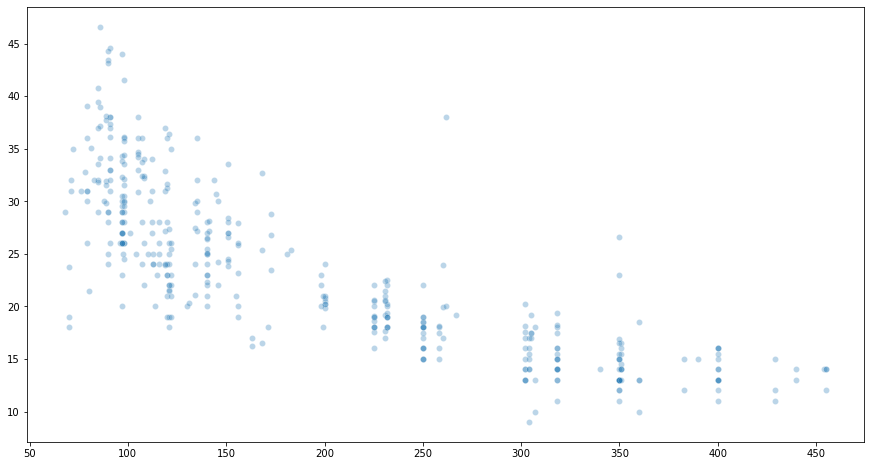

In [40]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.scatterplot(x=X, y=y, alpha=0.3)
plt.show()

### we see that the relationship between displacement and mpg is nonlinear
* nonlinear models will not do

In [41]:
#import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1),y, test_size=0.2, random_state=3)

#instantiate Decision tree regressor
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

# fit
dt.fit(X_train, y_train)

#predict
y_pred = dt.predict(X_test)


#get root mean squared errot
mse_dt = MSE(y_test, y_pred)
#compute test-set RMSE by raising to power 1/2
rmse_dt = mse_dt**(1/2)

#print MSE
print(rmse_dt)

5.102306888903137


# <hr> 

# Chapter 2
# Generalization Error
### We assume that there is a mapping y = f(x)
* Goals of supervised learning
    * find a model f_hat that best approximates f: f_hat ~ f
    * f_hat can be logistic, decision tree, neural network...
    * discard as much as possible
    * end goal: f_hat should achieve a low predictive error on unseen datasets
* difficulties when approximating f_hat
    * overfitting
        * fits the noise on the training set
        * prediction capabilities are low 
        * it memorizes noise and causes high test set error
    * underfitting
        * not flexible enough to fit the data
        * training set error is almost equal to test set error
        * both errors will be high
        * "like teaching calculus to a 3 year old. it does not have the mental abstraction to extrapolate to new things."
        * high bias
* generalization error tells you how much it generalizes on unseen data
    * f_hat = bias^2 + variance + irreducible erro
    * bias
        * how much is f_hat not equal to f
    * variance
        * how much f_hat is inconsistent over different training sets
        
* Model complexity
    * sets the flexibility of f_hat
    * ex: max tree depth, min samples per leaf, ...
* Bias-variance tradeoff
    * when model complexity increases, the variance increases while the bias decreases
    * when complexity decreases, varaince decreases and bias increases
    

# <hr> 

# Diganosing Bias and Variance Problems
* how do we estimate the generalization error of a model?
* cannot be done directly because f is unknown
* split into test/train set
* fit f_hat to training set
* evaluate the error of f_hat on the unseen test set
* generalization error of f_hat ~ test set error of f_hat
    * We use cross validation! 
        * k-fold validation
    * get f_hat error on training set
    * get f_hat error on test set
    * compare the 2 errors
    * if cv_error_f_hat > training_set_error_f_hat
        * f_hat has high variance and is overfit
        * decrease f_hat complexity
        

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

mpg = pd.read_csv('data/mpg.csv')

mpg.head(1)

y = mpg['mpg'].values
y.shape

# for simplicity we begin only 1 feature, namely displacement
X = mpg['displ'].values
X.shape, y.shape

y = y.reshape(-1,1)

X = X.reshape(-1,1)

In [56]:
SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)

dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=SEED)

MSE_CV = -cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

#result is numpy array of the 10 negative mean-squared-erros achieved on the 10 folds
# you can multiply the array by -1

dt.fit(X_train, y_train)

y_predict_train = dt.predict(X_train)

y_predict_test = dt.predict(X_test)


#CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

CV MSE: 19.94


In [57]:
# Training set MSE
print("Train MSE: {:.2f}".format(MSE(y_train, y_predict_train)))

Train MSE: 17.89


In [58]:
#Test Set MSE
print("Test MSE: {:.2f}".format(MSE(y_test, y_predict_test)))

Test MSE: 20.41


### Training set error is less than the CV error
* we can deduce that dt overfits the training set and that it suffers from high variance
* test set and cv errors are roughly equal

In [72]:
mpg.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


# Instantiate the model

In the following set of exercises, you'll diagnose the bias and variance problems of a regression tree. The regression tree you'll define in this exercise will be used to predict the mpg consumption of cars from the auto dataset using all available features.

We have already processed the data and loaded the features matrix X and the array y in your workspace. In addition, the DecisionTreeRegressor class was imported from sklearn.tree.

 

In [73]:
X = mpg.drop(['mpg', 'origin'], axis=1).values

In [74]:
y = mpg.mpg.values

In [75]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)



In [76]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


In [77]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


# <hr> 

# Ensemble learning
* Train different models on the same dataset
* let each model make predictions
* meta-model: aggregate predictions of individual models 
* final prediction: more robust and less prone to errors than each individual model
* best results when models are skillful in different ways

## Voting Classifier (with binary classification task)
* Using breast cancer data set
* X = all features
* y = diagnosis

In [98]:
cancer = pd.read_csv('data/wisconsin_breast_cancer.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [103]:
X = cancer.drop(['id','diagnosis', 'Unnamed: 32'], axis=1)
y = cancer.diagnosis

In [104]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [118]:
#import libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

#set seed for reproducibility
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = SEED)

#instantiate models
lr = LogisticRegression(max_iter=2350,random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)

#define list called classifier that contains tuples corresponding to the names (classifier_name, classifier)
classifiers = [("Logistic Regression", lr), ('K Nearest Neighbors', knn), ('Classification Tree', dt)]

In [119]:
# itereate over list of classifier to fit each classifier to the training set, evaluate its accuracy on the test set, and print the result
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    
    #predict labels of the test set
    y_pred = clf.predict(X_test)
    
    #evaluate accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))
    

Logistic Regression : 0.947
K Nearest Neighbors : 0.930
Classification Tree : 0.930


In [120]:
#instantiate voting classifier as vc
vc = VotingClassifier(estimators=classifiers)

#fit 'vc' to the training set and predict the test labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

# evaluate the test-set accuracy of 'vc'
print('Voting classifier: {}'.format(accuracy_score(y_test, y_pred)))

Voting classifier: 0.9532163742690059


# <hr> 

# Bagging
* Bootstrap aggregation a.k.a "Bagging"
### Ensemble Methods
* Voting classifier
    * fit to the same training models
    * not the same algorithm 
    * the final predictions are obtained by majority voting
* Bagging
    * ensemble is formed by one model that uses the same training algorithm
    * not trained on the entire training set
    * instead, each model is trained on a different subset of the data
    * has the effect of reducing variance of individual models in the ensemble
    * samples with replacement
    * Training
        * draws N different bootstrap samples from the training set
        * each of the bootstrap samples are then used to train N-models that use the same algorithm
        * when a new instance is fed to the different models forming the bagging ensemble, each model outputs its prediction
        * The meta model collects these predictions and outputs a final prediction, depending on the nature of the problem
    * Classification
        * the output is produced by majority voting
        * BaggingClassifier
    * Regression
        * the final prediction is the average of the predictions maded by the individual models forming the ensemble
        * BaggingRegressor
    

In [124]:
#import libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import BaggingClassifier

cancer = pd.read_csv('data/wisconsin_breast_cancer.csv')
cancer.head()

X = cancer.drop(['id','diagnosis', 'Unnamed: 32'], axis=1)
y = cancer.diagnosis

In [125]:
SEED=1

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=SEED)

#instantiate classification tree dt
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

#instantiate bagging classifier
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)

#fit bc to training set
bc.fit(X_train, y_train)

#predict test labels
y_pred = bc.predict(X_test)

#evaluate and print test-set accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.942


# Exercise
# Define the bagging classifier

In the following exercises you'll work with the Indian Liver Patient dataset from the UCI machine learning repository. Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

In [136]:
indian_liver = pd.read_csv('data/indian_liver_patient_preprocessed.csv')
indian_liver.drop("Unnamed: 0", axis=1, inplace=True)
indian_liver.head(1)

X = indian_liver.drop('Liver_disease', axis=1)
y = indian_liver['Liver_disease']

In [131]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

In [137]:
# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.94


In [138]:
y

0      1
1      1
2      1
3      1
4      1
      ..
574    0
575    1
576    1
577    1
578    0
Name: Liver_disease, Length: 579, dtype: int64

# <hr> 

# Out of bag evaluation
* some instances may be sampled several times for one model
* other instances may not be sampled at all
* On average, for each model 63% of the training instances are sampled
* the remaining 37% constitute what is known as the out-of-bag instances (OOB)
    * these are not seen by the model during training
    * these can then be used to estimate the performance of the model without the need for cross validation
    * known as OOB evaluation
        * oob score 
            * accuracy for classifier
            * r-squared score for regressors

### How does it work?

In [139]:
#import libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import BaggingClassifier

cancer = pd.read_csv('data/wisconsin_breast_cancer.csv')
cancer.head()

X = cancer.drop(['id','diagnosis', 'Unnamed: 32'], axis=1)
y = cancer.diagnosis

In [141]:
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=SEED)

dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

#instantiate a bagging classifier, set oob_score=True
# this allows us to evaluate the oob accuracy after training
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, oob_score=True, n_jobs=-1)

#fit
bc.fit(X_train, y_train)

#predict
y_pred = bc.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

#evaluate oob accuracy from bc
oob_accuracy = bc.oob_score_

#print test set accuracy
print("Test set accuracy: {:.3f}".format(test_accuracy))

#print oob accuracy
print("OOB accuracy {:.3f}".format(oob_accuracy))


Test set accuracy: 0.930
OOB accuracy 0.917


# Exercise
# Prepare the ground

In the following exercises, you'll compare the OOB accuracy to the test set accuracy of a bagging classifier trained on the Indian Liver Patient dataset.

In sklearn, you can evaluate the OOB accuracy of an ensemble classifier by setting the parameter oob_score to True during instantiation. After training the classifier, the OOB accuracy can be obtained by accessing the .oob_score_ attribute from the corresponding instance.

In your environment, we have made available the class DecisionTreeClassifier from sklearn.tree.

In [144]:
indian_liver = pd.read_csv('data/indian_liver_patient_preprocessed.csv')
indian_liver.drop("Unnamed: 0", axis=1, inplace=True)
indian_liver.head(1)

,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,1.247403,-0.42032,-0.495414,-0.42887,-0.355832,-0.319111,0.293722,0.203446,-0.14739,0,1


In [143]:
X = indian_liver.drop('Liver_disease', axis=1)
y = indian_liver['Liver_disease']


# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.942, OOB accuracy: 0.947


# <hr> 

<h1 style="text-align: center;"> Random Forests </h1>

# Another ensemble method
* Base estimator = Decision Tree
* each estimator is trained on a different bootstrap sample having the same size as the training set
* introduces further randomization than bagging when training each of the base estimators
* When each tree is trained, only d-features can be sampled at each node with out replacement
    * (d < total number of features)
* the node is then split using the sampled feature that maximizes information again
* in scikit learn d defaults to the square root of the number of features
* once trained, predictions can be made on new instances
* when a new instance is fed to the different base estimators, each of them outputs a prediction
    * the predictions are then collected by the random forests meta-classifier and the final prediction is made depending on the nature of the problem, i.e. classification//regression
    * if classification: prediction is made by majority voting
    * if regression: average of all lables predicted by the best estimators
    * random forest achieves a lower variance than individual trees

### Auto dataset 

In [170]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
import numpy as np

mpg = pd.read_csv('data/mpg.csv')

mpg.head(1)

y = mpg['mpg'].values
y.shape

# for simplicity we begin only 1 feature, namely displacement
X = mpg.drop(['mpg','origin'], axis=1).values
y = y.ravel()
# X = X.reshape(-1,1)
y.shape,X.shape

((392,), (392, 5))

In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED=1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

#fit
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)

print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 3.98


### Access the feature importance from the model 

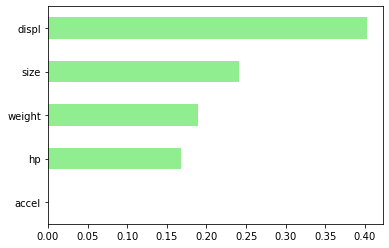

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
X = mpg.drop(['mpg','origin'], axis=1)
y = mpg['mpg']
#create a pd.series of features importances
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

sorted_importances_rf = importances_rf.sort_values()

sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()

# <hr> 

<h1 style="text-align: center;"> AdaBoost</h1>

# AdaBoost
* boosting referst to an ensemble method in which many predictors are trained and  each predictor learns from the errors of its predecessor
* many weak learners are combined to form a strong learner
* Weak Learner: model doing slightly better than random guessing... not well at all

# Boosting:
    * train an ensemble predictors sequentially
    * each predictor tries to correct its predecessor
* most common boosting methods
    * AdaBoost
    * Gradient Boosting
* AdaBoost = Adaptive Boosting
    * each predictor pays attention to the errors of its predecessor by constantly changing the weights of training instances
    * each predictor is assigned a coefficient,  $ \alpha\ $
    * $ \alpha\ $ depends on the predictor's training error
    * there are n-predictors
* Prediction
    * classification
        * weighted majority voting
        * AdaBoostClassifier
    * Regression
        * weighted average
        * AdaBoostRegressor

In [177]:
#import libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

cancer = pd.read_csv('data/wisconsin_breast_cancer.csv')
cancer.head()

X = cancer.drop(['id','diagnosis', 'Unnamed: 32'], axis=1)
y = cancer.diagnosis

In [178]:
SEED =1

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=SEED)

In [179]:
dt = DecisionTreeClassifier(max_depth=1, random_state=SEED)

In [180]:
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=100)

In [181]:
adb_clf.fit(X_train, y_train)

#predict the test set probabilities of positive class
#this enables you to evaluate ROC-AUC score of adb_clf
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

In [182]:
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

In [183]:
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.99


<h1 style="text-align: center;"> Gradient Boosting</h1>

* Sequential correction of predecessors errors
* does not tweak weights of training instances
* each predictor is trained using the residual errors of its predecessors as labels
    * essentially, finding the residuals of residuals
* Shrinkage
    * the prediction of each tree in the ensemble is shrinked after it is multiplied by a learning rate $\eta\\$
        * 0 < $\eta\ $ < 1
        
    * 

In [186]:
X = mpg.drop(['mpg','origin'], axis=1)
y = mpg['mpg']

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)



In [187]:
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)

In [188]:
gbt.fit(X_train, y_train)
y_pred = gbt.predict(X_test)

#evaluate the test set for RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

print(rmse_test)

4.08300144003074


<h1 style='text-align:center;'> Stochastic Gradient Boosting</h1>

### Gradient Boosting Cons
* GB involves exhaustive search procedure
* Each CART is trained to find the best split points and features
* may lead to CARTs using the same split points and maybe the same features

* Stochastic Gradient Boosting
    * each CART is trained on a random subset of the training data
    *  the subset is sampled without replacement (40-80% of the training set)
    * features are sampled without replacement when choosing split points
    * Effect: further diversity in the ensemble of trees
    * only a fraction of the training instances are passed to a tree
        * the sampled data is then used to train the tree
        * not all features are considered only a random sample
        * once the tree is trained residual errors can be computed
        * these residuals are multiplied by "eta" and are fed to the next tree in the ensemble
        

In [193]:
X = mpg.drop(['mpg','origin'], axis=1)
y = mpg['mpg']

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators=300, random_state=SEED)

sgbt.fit(X_train, y_train)

y_pred = sgbt.predict(X_test)

rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_test

4.282236502853863

# <hr> 

<h1 style="text-align:center;"><font color='red'> Model Tuning</font></h1>

# Tuning a carts hyperparameters
* to obtain better performance, the hyperparameters should be tuned
* parameters are learned from data through training
    * split point of a node
    * split feature of a node, etc
* Hyperparameters
    * not learned from data
    * need to be adjusted (tuned) before implementing the model
    * examples: max_depth, min_samples_leaf, etc
* Tuning is searching for the optimal hyperparameters for a learning algorithm
* solution : finding the set of hyperparameters that yield the optimal model
* the optimal model yields an optimal score
* score function measures the agreement to accuracy for classification and R^2 for regression
* cross validation is used to estimate the generalization performance
    * i.e. how well it will when you introduce new data to predict on
* Why tune?
    * the default settings are not optimal for ALL problems
* approaches:
    * Grid search
    * random search
    * bayesion optimization
    * genetic algorithms
* We focus on grid-search here
    * GridCV
        * manually set a grid of discrete hyperparameter values
            * like in a list to pass to the pipeline
        * set a metric for scoring model performance
        * search exhaustively through the grid
        * for each set of hyperparameters you evaluate each model's CV score
        * the optimal hyperparameters are those of the model achieving the best CV score
        * Grid search suffers from the curse of dimensionality
            * the larger the grid, the longer it takes to find a solution
        

In [197]:
#import libraries
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


cancer = pd.read_csv('data/wisconsin_breast_cancer.csv')
cancer.head()

X = cancer.drop(['id','diagnosis', 'Unnamed: 32'], axis=1)
y = cancer.diagnosis

dt = DecisionTreeClassifier(random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [198]:
# define dictionary with the hyperparameters you want to tune (this is the GRID)
params_dt = {'max_depth': [3,4,5,6],
            'min_samples_leaf':[0.04, 0.06, 0.08],
            'max_features': [0.2, 0.4, 0.6, 0.8]}

In [199]:
grid_dt = GridSearchCV(estimator=dt,
                      param_grid=params_dt,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1)

In [202]:
#fit grid to training set
grid_dt.fit(X_train, y_train)

#extract best params from grid_dt
best_params = grid_dt.best_params_
print(best_params)

{'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.06}


In [203]:
#extract best CV score from grid_dt
best_CV_score = grid_dt.best_score_
print(best_CV_score)

0.9342995169082127


In [204]:
#extract best model
best_model = grid_dt.best_estimator_

#evaluate best_model's test set accuracy
test_acc = best_model.score(X_test, y_test)

print(test_acc)

0.868421052631579


# <hr> 

<h1 style="text-align:center;"> Tuning An RF's Hyperparameters<h1>

# Tuning random forests
* ensemble method

In [208]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
SEED = 1

rf = RandomForestRegressor(random_state=SEED)


In [206]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [209]:
X = mpg.drop(['mpg','origin'], axis=1)
y = mpg['mpg']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=SEED)

In [212]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

params_rf = {"n_estimators": [300, 400, 500],
            'max_depth': [4, 6, 8],
            'min_samples_leaf': [0.1, 0.2],
            'max_features': ['log2', 'sqrt']}

In [214]:
grid_rf = GridSearchCV(estimator=rf,
                      param_grid=params_rf,
                      cv=3,
                      scoring='neg_mean_squared_error',
                      verbose=1,
                      n_jobs=-1)

In [215]:
#fit grid_rf
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [216]:
#extract best parameters
best_hyperparameters = grid_rf.best_params_
print(best_hyperparameters)

{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 300}


In [217]:
#extract best model from grid_rf
best_model = grid_rf.best_estimator_

#predic the test labels
y_pred = best_model.predict(X_test)

#evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

print(rmse_test)

3.919344081331026
